In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Extract features and targets
X = heart_disease.data.features
y = heart_disease.data.targets

# Concatenate features and targets into one table
df = pd.concat([X, y], axis=1)

print("Dimension", df.shape)
df.head(10)

Dimension (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

df.info()

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 K

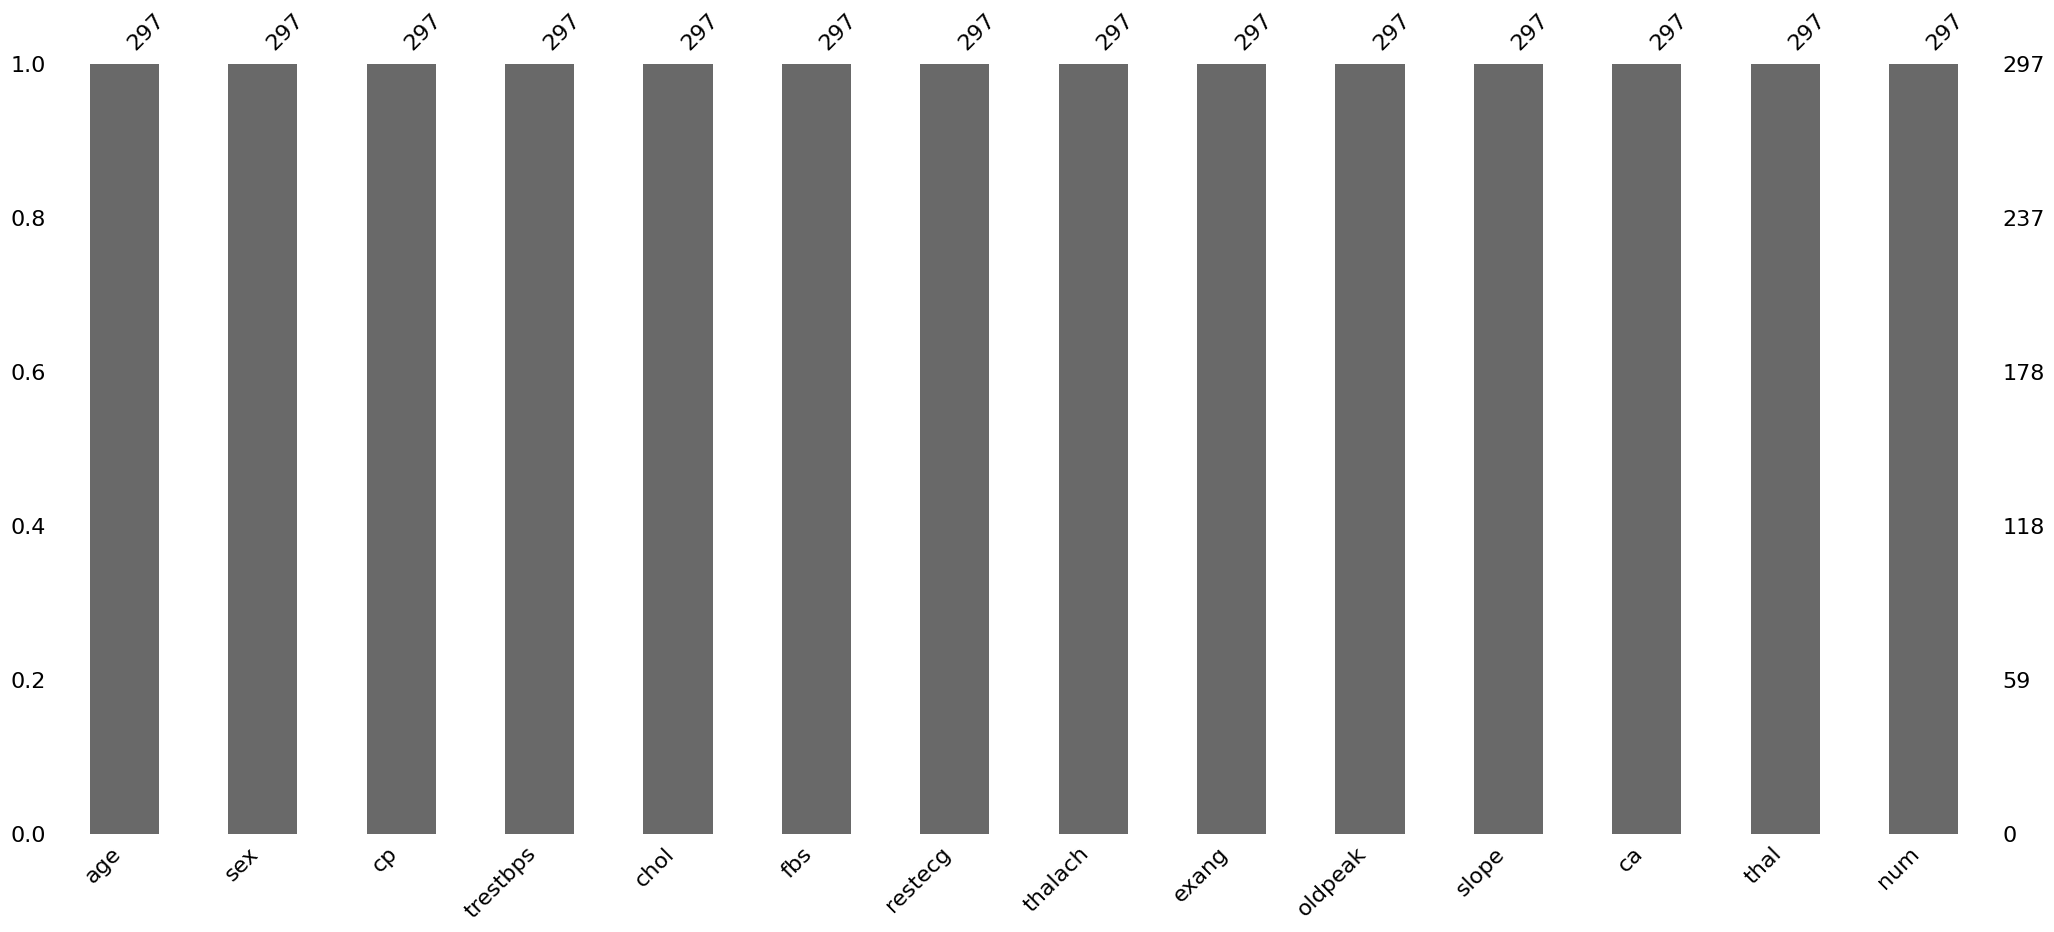

In [ ]:
# Display histogram data
import missingno as mns
import matplotlib.pyplot as plt

mns.bar(df)
plt.show()

In [ ]:
# Detect duplicate rows
duplicateRows = df[df.duplicated()]

# Remove duplicate rows if exists
if duplicateRows.empty:
    print("No duplicate rows")
else:
    print("Duplicate rows:")
    print(duplicateRows)

No duplicate rows


In [ ]:
# Converting into factors

col_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df.columns = col_names

# Change ca to int64 type
df['ca'] = df['ca'].astype('int64')

# Change thal to int64 type
df['thal'] = df['thal'].astype('int64')

# Convert to factors
cols_to_convert = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
df[cols_to_convert] = df[cols_to_convert].apply(lambda col: col.astype('category'))

# Change num to only classify based on healthy and sick
df['num'] = df['num'].replace({1: 1, 2: 1, 3: 1, 4: 1})
df['num'] = df['num'].astype('bool')


df.info()

for col in cols_to_convert:
    print(f"Categories for {col}:")
    print(df[col].cat.categories)

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       297 non-null    int64   
 1   sex       297 non-null    category
 2   cp        297 non-null    category
 3   trestbps  297 non-null    int64   
 4   chol      297 non-null    int64   
 5   fbs       297 non-null    category
 6   restecg   297 non-null    category
 7   thalach   297 non-null    int64   
 8   exang     297 non-null    category
 9   oldpeak   297 non-null    float64 
 10  slope     297 non-null    category
 11  ca        297 non-null    category
 12  thal      297 non-null    category
 13  num       297 non-null    bool    
dtypes: bool(1), category(8), float64(1), int64(4)
memory usage: 17.7 KB
Categories for sex:
Index([0, 1], dtype='int64')
Categories for cp:
Index([1, 2, 3, 4], dtype='int64')
Categories for fbs:
Index([0, 1], dtype='int64')
Categories for restecg:
Index([0, 1

<Axes: >

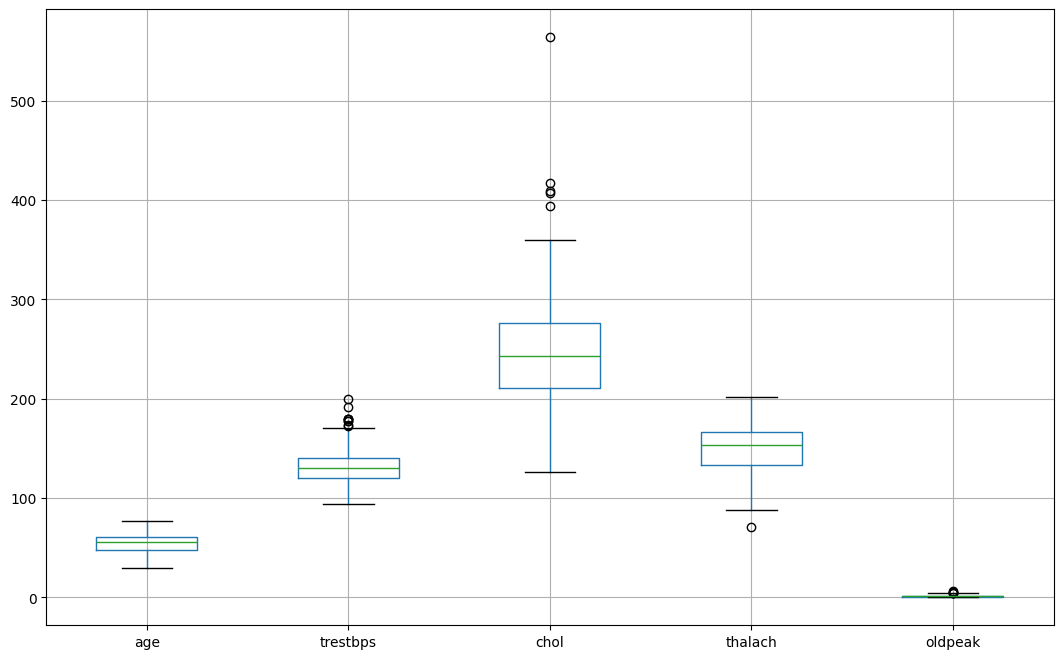

In [ ]:
# Visualising outliers for non-categorical data
non_categorical_columns = ['age','trestbps', 'chol', 'thalach','oldpeak']
df_non_categorical = df[non_categorical_columns].copy()
df_non_categorical.boxplot(figsize=(13,8))

<Axes: >

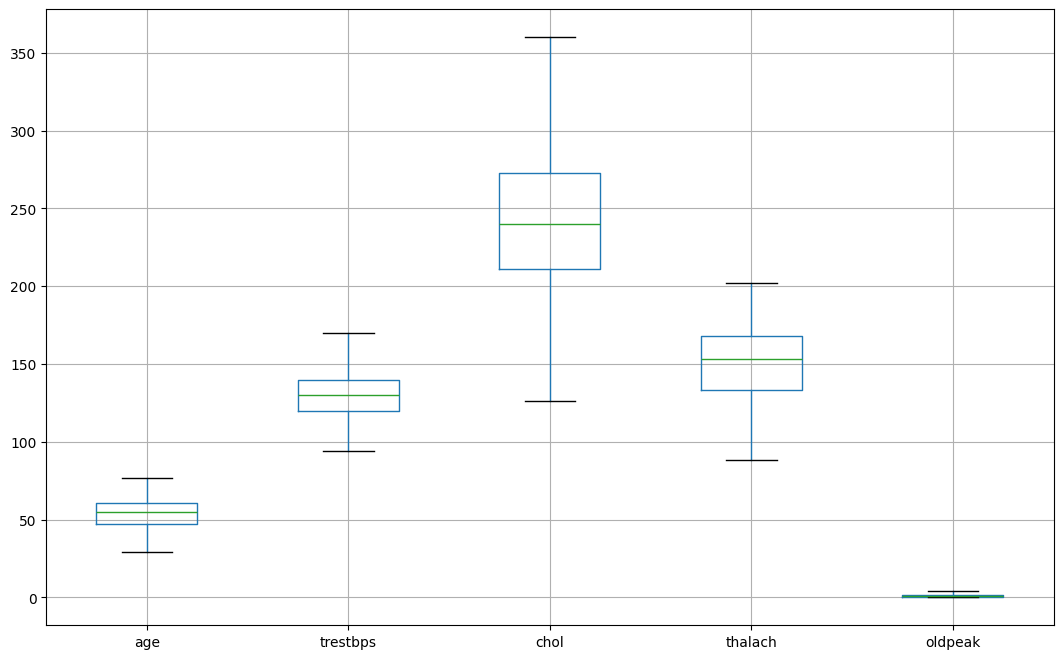

In [ ]:
import numpy as np

# Removing outliers in non-categorical data
def remove_outliers(df, columns):
    # Create a boolean mask for outliers in any of the specified columns
    outliers_mask = np.zeros(len(df), dtype=bool)

    for col in columns:
        # Calculate IQR for the column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers for the current column
        outliers_index = ((df[col] < lower_bound) | (df[col] > upper_bound))

        # Update the outliers mask
        outliers_mask |= outliers_index

    # Remove rows with outliers
    df = df[~outliers_mask].reset_index(drop=True)

    return df

# Remove outliers from the original DataFrame
df = remove_outliers(df, non_categorical_columns)

# Display the boxplot after removing outliers
df[non_categorical_columns].boxplot(figsize=(13, 8))

In [ ]:
# Shuffle the data frame to avoid bias
from sklearn.utils import shuffle
df = shuffle(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 102 to 268
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       278 non-null    int64   
 1   sex       278 non-null    category
 2   cp        278 non-null    category
 3   trestbps  278 non-null    int64   
 4   chol      278 non-null    int64   
 5   fbs       278 non-null    category
 6   restecg   278 non-null    category
 7   thalach   278 non-null    int64   
 8   exang     278 non-null    category
 9   oldpeak   278 non-null    float64 
 10  slope     278 non-null    category
 11  ca        278 non-null    category
 12  thal      278 non-null    category
 13  num       278 non-null    bool    
dtypes: bool(1), category(8), float64(1), int64(4)
memory usage: 16.6 KB


In [ ]:
#Summary statistics
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,278.000000,278.0,278.0,278.000000,278.000000,278.0,278.0,278.000000,278.0,278.000000,278.0,278.0,278.0,278
unique,NaN,2.0,4.0,NaN,NaN,2.0,3.0,NaN,2.0,NaN,3.0,4.0,3.0,2
top,NaN,1.0,4.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,1.0,0.0,3.0,False
freq,NaN,193.0,129.0,NaN,NaN,240.0,140.0,NaN,190.0,NaN,135.0,164.0,158.0,154
mean,54.172662,NaN,NaN,129.949640,243.147482,NaN,NaN,150.000000,NaN,0.963669,NaN,NaN,NaN,NaN
std,9.136690,NaN,NaN,15.598215,44.900972,NaN,NaN,22.728185,NaN,1.030585,NaN,NaN,NaN,NaN
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,88.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,47.000000,NaN,NaN,120.000000,211.000000,NaN,NaN,133.250000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,55.000000,NaN,NaN,130.000000,240.000000,NaN,NaN,153.000000,NaN,0.600000,NaN,NaN,NaN,NaN
75%,60.750000,NaN,NaN,140.000000,272.500000,NaN,NaN,167.750000,NaN,1.600000,NaN,NaN,NaN,NaN


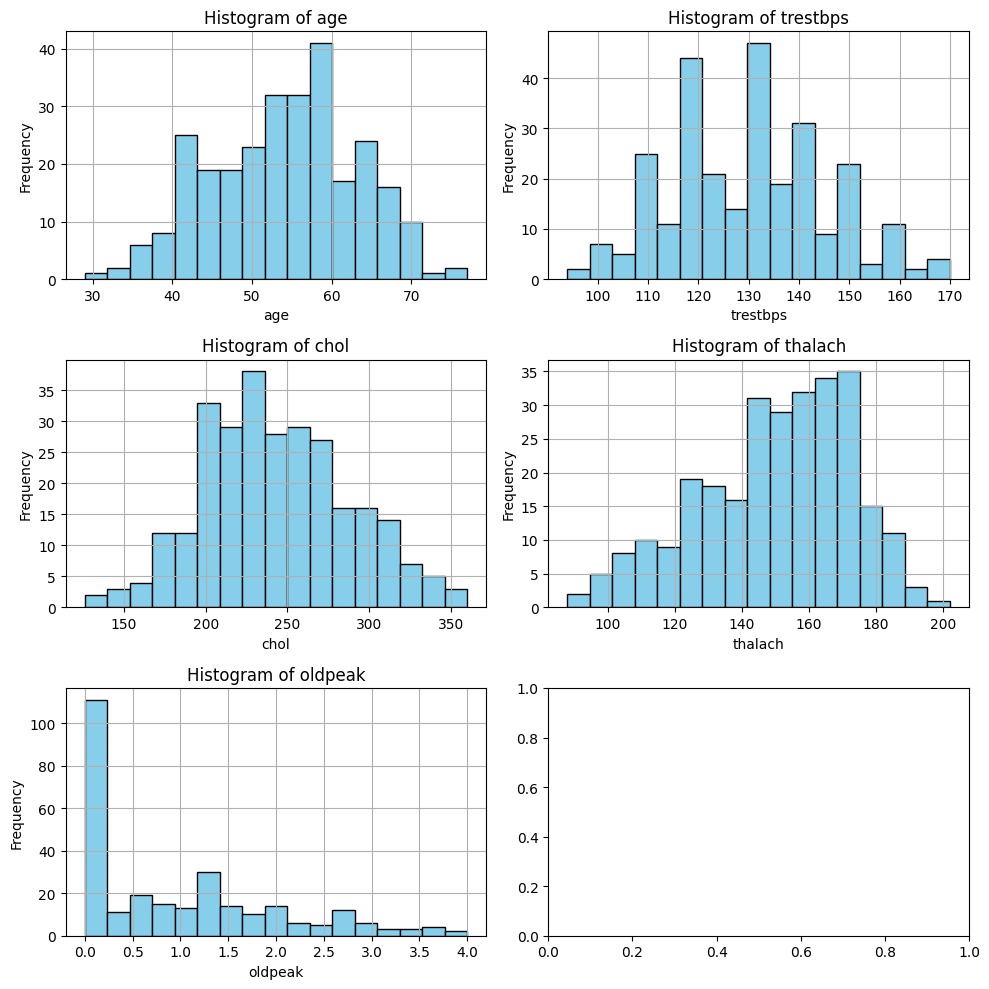

In [ ]:
# Histograms for continuous features
continuous_cols = ['age','trestbps','chol','thalach','oldpeak']

fig, axes = plt.subplots(3, 2, figsize=(10,10))

# Flatten the axes array to facilitate indexing
axes = axes.flatten()

# Iterate over each continuous column and plot a histogram
for i, column in enumerate(continuous_cols):
    ax = axes[i]  # Select the current axis
    ax.hist(df[column], bins=17, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

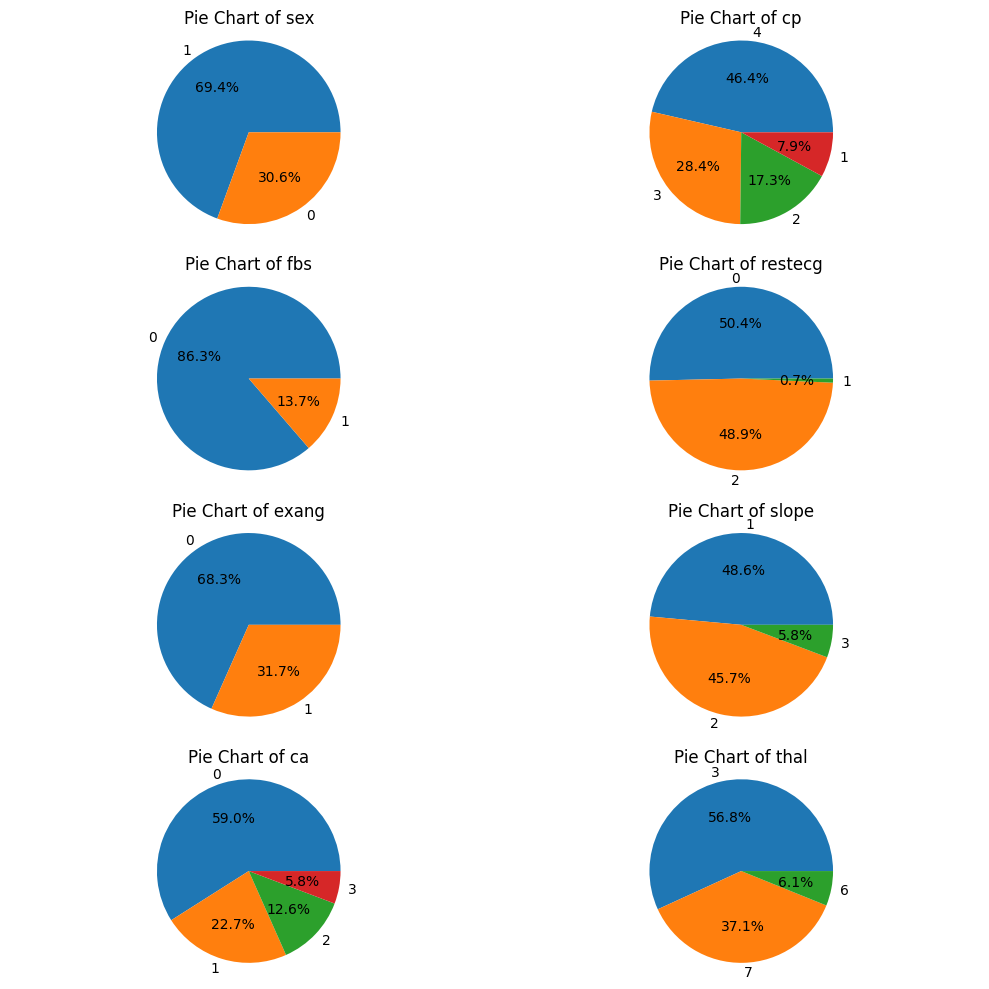

In [ ]:
# Pie Chart for categorical features

fig, axes = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the axes array to facilitate indexing
axes = axes.flatten()

# Iterate over each categorical column and plot a pie chart
for i, column in enumerate(cols_to_convert):
    ax = axes[i]  # Select the current axis
    # Calculate counts for each category
    category_counts = df[column].value_counts()
    # Plot the pie chart
    ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    ax.set_title(f'Pie Chart of {column}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

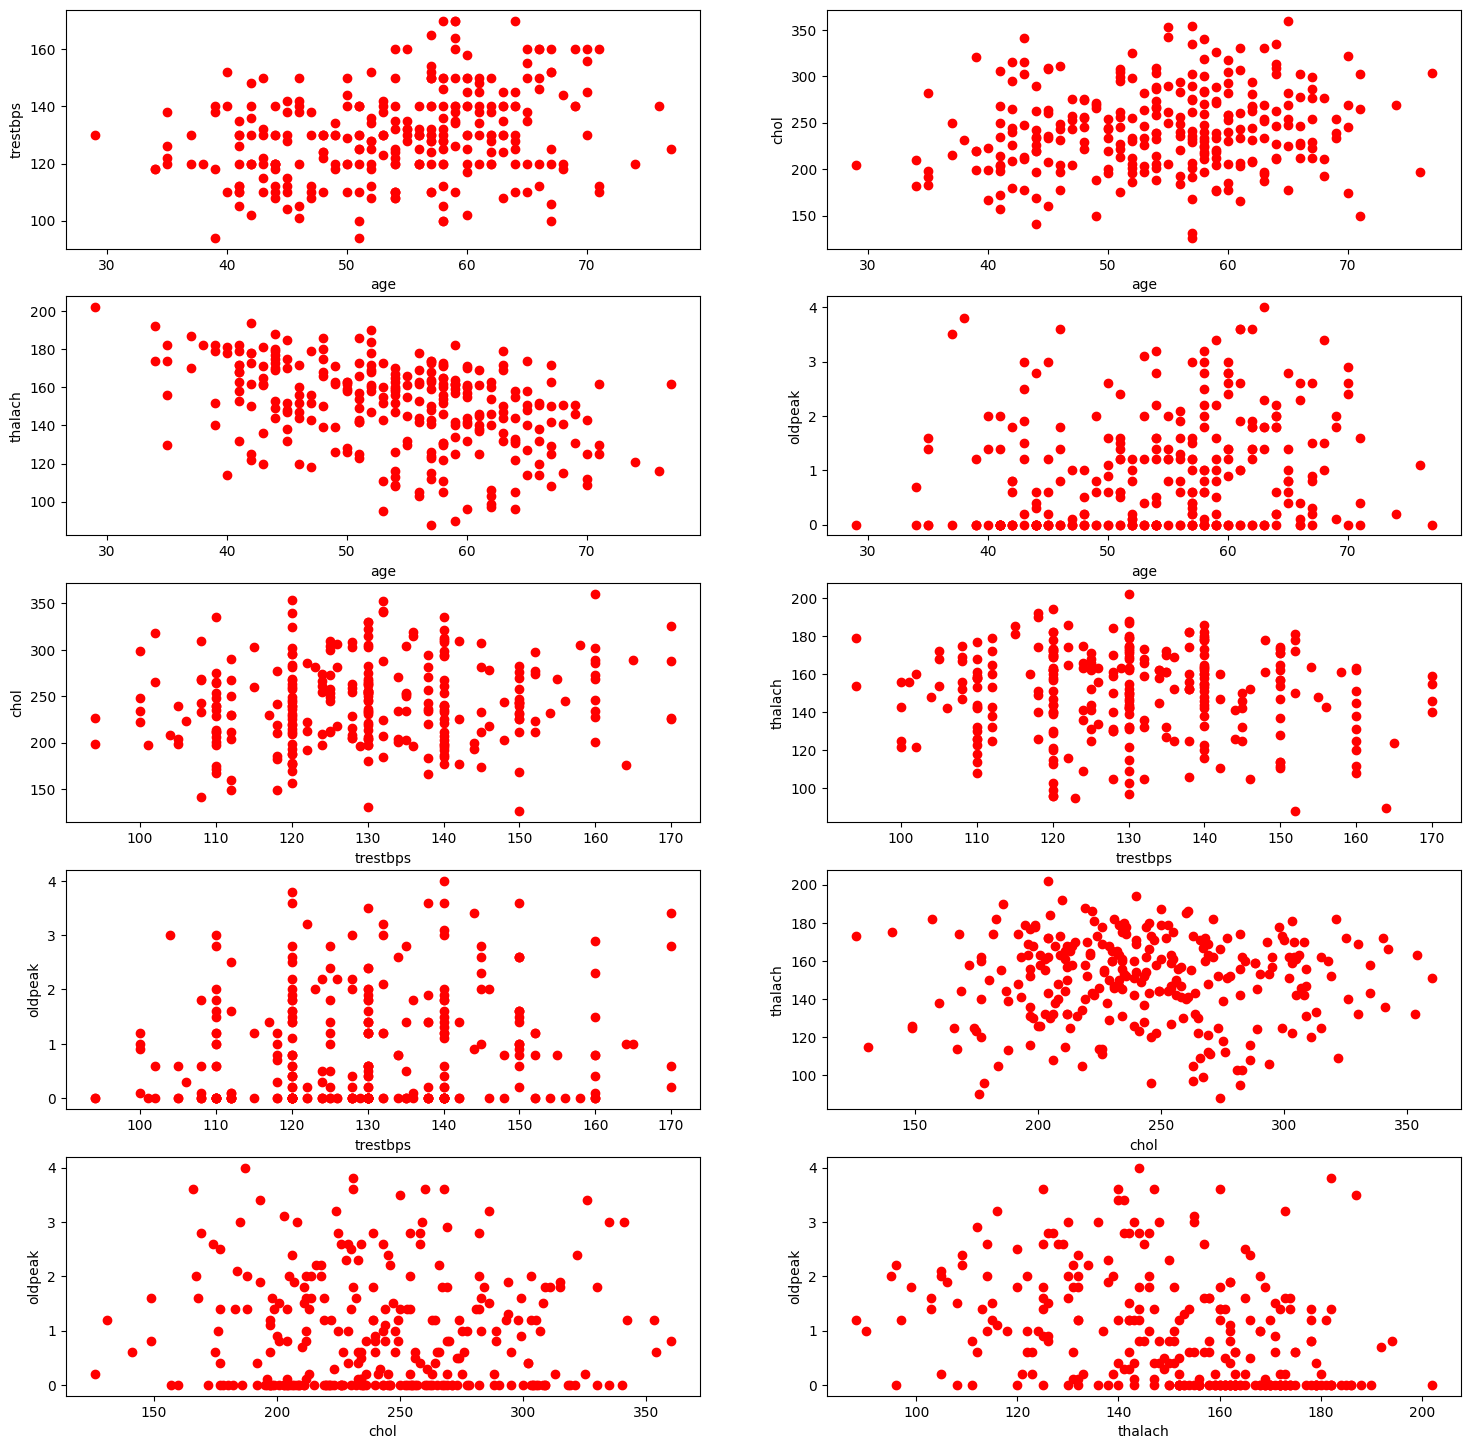

In [ ]:
# Scatter plot for each pair of continuous attributes

df_nc = df[continuous_cols].copy()

fig, axes = plt.subplots(5, 2, figsize=(18,18))
index = 0
for i in range(4):
    for j in range(i+1,5):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(df_nc[df_nc.columns[i]], df_nc[df_nc.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(df_nc.columns[i])
        axes[ax1][ax2].set_ylabel(df_nc.columns[j])
        index = index + 1

<Axes: >

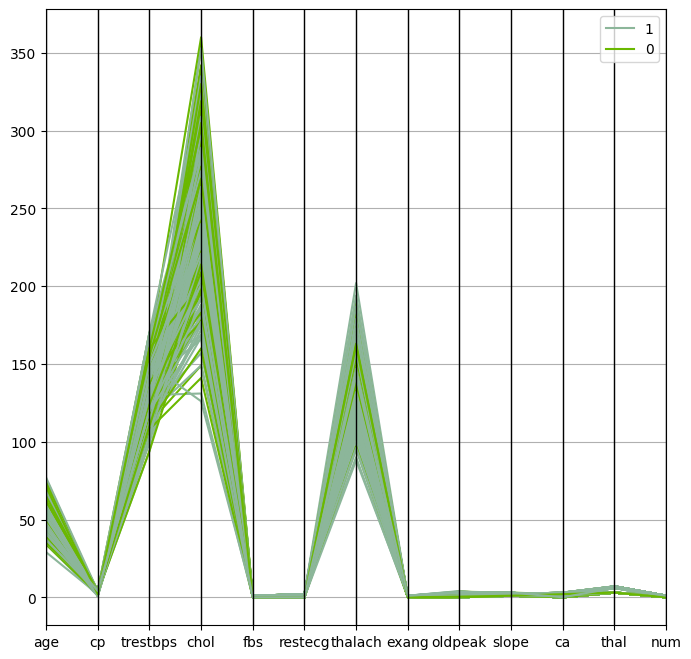

In [ ]:
# Parallel Coordinates
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8,8))
parallel_coordinates(df, 'sex')

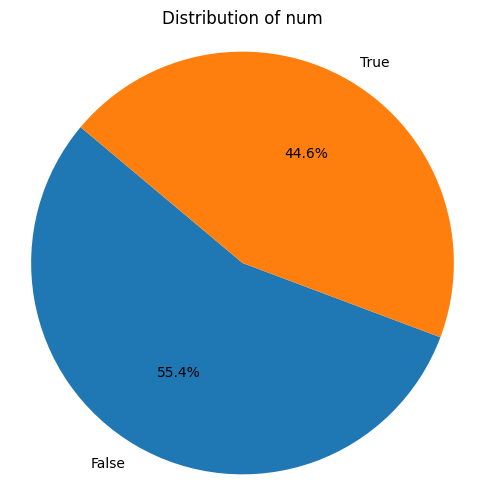

In [ ]:
# Pie chart for target variable
num_counts = df['num'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(num_counts, labels=num_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of num')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
# Using Mutual Information for Feature Selection
from sklearn.feature_selection import mutual_info_classif

X = df.iloc[:,0:13]
y = df['num']
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Compute mutual information scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Mutual_Information_Score': mi_scores})

# Sort features by their scores in descending order
feature_scores = feature_scores.sort_values(by='Mutual_Information_Score', ascending=False)

feature_scores

,Feature,Mutual_Information_Score
12,thal,0.132741
2,cp,0.127101
11,ca,0.106881
8,exang,0.085384
9,oldpeak,0.083753
10,slope,0.079566
4,chol,0.071286
7,thalach,0.068264
1,sex,0.058973
6,restecg,0.023929


In [ ]:
#Using Chi-square to do Feature Selection for categorical variables
from sklearn.feature_selection import chi2

chi2_stats, p_values = chi2(df[cols_to_convert], df['num'])
feature_chi2 = pd.DataFrame({'Feature': cols_to_convert, 'Chi2_Statistic': chi2_stats, 'P_Value': p_values})

# Sort features by their chi-square statistics in descending order
feature_chi2 = feature_chi2.sort_values(by='Chi2_Statistic', ascending=False)

feature_chi2

,Feature,Chi2_Statistic,P_Value
6,ca,73.327207,1.098433e-17
7,thal,63.347182,1.733031e-15
4,exang,32.904378,9.680502e-09
1,cp,13.297751,2.657247e-04
3,restecg,9.072886,2.594272e-03
0,sex,8.315578,3.930649e-03
5,slope,6.298718,1.208253e-02
2,fbs,0.000270,9.868875e-01


In [ ]:
# Remove irrelevant features
features_to_remove = ['age','sex','trestbps','chol','fbs','restecg','slope']
df.drop(columns = features_to_remove, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 102 to 268
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   cp       278 non-null    category
 1   thalach  278 non-null    int64   
 2   exang    278 non-null    category
 3   oldpeak  278 non-null    float64 
 4   ca       278 non-null    category
 5   thal     278 non-null    category
 6   num      278 non-null    bool    
dtypes: bool(1), category(4), float64(1), int64(1)
memory usage: 8.5 KB


In [ ]:
#One-hot Encoding

# Mapping values for "thal" and "cp" columns
thal_mapping = {3: 'normal', 6: 'fixed defect', 7: 'reversible defect'}
cp_mapping = {1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal pain', 4: 'asymptomatic'}

# Applying mapping to "thal" and "cp" columns
df['thal'] = df['thal'].map(thal_mapping)
df['cp'] = df['cp'].map(cp_mapping)

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['thal', 'exang', 'cp', 'ca'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 102 to 268
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   thalach                 278 non-null    int64  
 1   oldpeak                 278 non-null    float64
 2   num                     278 non-null    bool   
 3   thal_normal             278 non-null    bool   
 4   thal_fixed defect       278 non-null    bool   
 5   thal_reversible defect  278 non-null    bool   
 6   exang_0                 278 non-null    bool   
 7   exang_1                 278 non-null    bool   
 8   cp_typical angina       278 non-null    bool   
 9   cp_atypical angina      278 non-null    bool   
 10  cp_non-anginal pain     278 non-null    bool   
 11  cp_asymptomatic         278 non-null    bool   
 12  ca_0                    278 non-null    bool   
 13  ca_1                    278 non-null    bool   
 14  ca_2                    278 non-null    bool 

,thalach,oldpeak,num,thal_normal,thal_fixed defect,thal_reversible defect,exang_0,exang_1,cp_typical angina,cp_atypical angina,cp_non-anginal pain,cp_asymptomatic,ca_0,ca_1,ca_2,ca_3
102,150,0.4,True,False,False,True,True,False,False,False,True,False,False,True,False,False
162,132,2.0,True,False,True,False,True,False,False,False,False,True,False,False,True,False
129,103,1.4,True,False,False,True,True,False,False,True,False,False,False,True,False,False
110,132,0.0,False,False,True,False,True,False,False,True,False,False,True,False,False,False
90,161,0.0,True,False,False,True,False,True,False,False,False,True,False,True,False,False


In [ ]:
# Normalise quantitative variables
from sklearn.preprocessing import MinMaxScaler

# Extracting continuous coloumns
continuous_columns = ['thalach','oldpeak']

# MinMax Normalisation
scaler = MinMaxScaler()
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 102 to 268
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   thalach                 278 non-null    float64
 1   oldpeak                 278 non-null    float64
 2   num                     278 non-null    bool   
 3   thal_normal             278 non-null    bool   
 4   thal_fixed defect       278 non-null    bool   
 5   thal_reversible defect  278 non-null    bool   
 6   exang_0                 278 non-null    bool   
 7   exang_1                 278 non-null    bool   
 8   cp_typical angina       278 non-null    bool   
 9   cp_atypical angina      278 non-null    bool   
 10  cp_non-anginal pain     278 non-null    bool   
 11  cp_asymptomatic         278 non-null    bool   
 12  ca_0                    278 non-null    bool   
 13  ca_1                    278 non-null    bool   
 14  ca_2                    278 non-null    bool 

In [ ]:
X = df.drop(columns=['num'])
y = df['num']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 102 to 268
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   thalach                 278 non-null    float64
 1   oldpeak                 278 non-null    float64
 2   thal_normal             278 non-null    bool   
 3   thal_fixed defect       278 non-null    bool   
 4   thal_reversible defect  278 non-null    bool   
 5   exang_0                 278 non-null    bool   
 6   exang_1                 278 non-null    bool   
 7   cp_typical angina       278 non-null    bool   
 8   cp_atypical angina      278 non-null    bool   
 9   cp_non-anginal pain     278 non-null    bool   
 10  cp_asymptomatic         278 non-null    bool   
 11  ca_0                    278 non-null    bool   
 12  ca_1                    278 non-null    bool   
 13  ca_2                    278 non-null    bool   
 14  ca_3                    278 non-null    bool 

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


                 Model  Accuracy  Precision    Recall        F1
0                  KNN  0.821429   0.833333  0.681818  0.750000
1  Logistic Regression  0.821429   0.750000  0.818182  0.782609
2        Random Forest  0.785714   0.708333  0.772727  0.739130
3                  MLP  0.821429   0.750000  0.818182  0.782609


<ipython-input-31-8f4b814bd86a>:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')
<ipython-input-31-8f4b814bd86a>:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')
<ipython-input-31-8f4b814bd86a>:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')
<ipython-input-31-8f4b814bd86a>:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')
/usr/local/lib/python3.11/dist-packages/

                 Model  Accuracy  Precision    Recall        F1
0                  KNN  0.821429   0.833333  0.681818  0.750000
1  Logistic Regression  0.821429   0.750000  0.818182  0.782609
2        Random Forest  0.785714   0.708333  0.772727  0.739130
3                  MLP  0.821429   0.750000  0.818182  0.782609


<ipython-input-31-8f4b814bd86a>:158: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')
<ipython-input-31-8f4b814bd86a>:158: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')
<ipython-input-31-8f4b814bd86a>:158: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')
<ipython-input-31-8f4b814bd86a>:158: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')


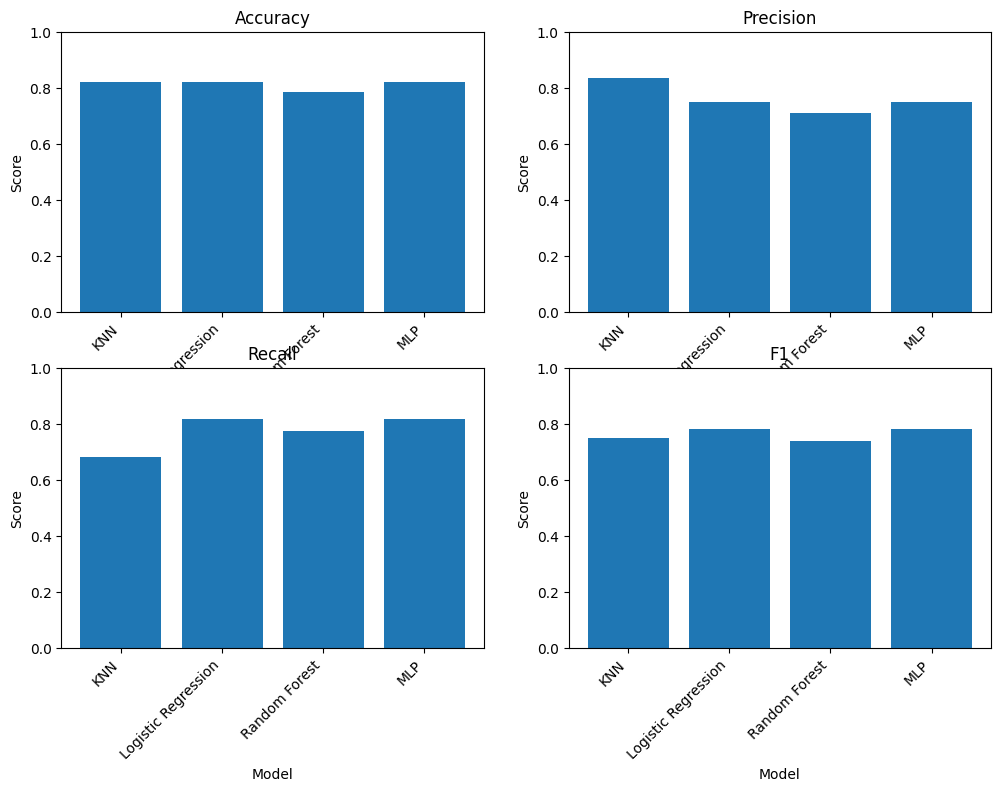

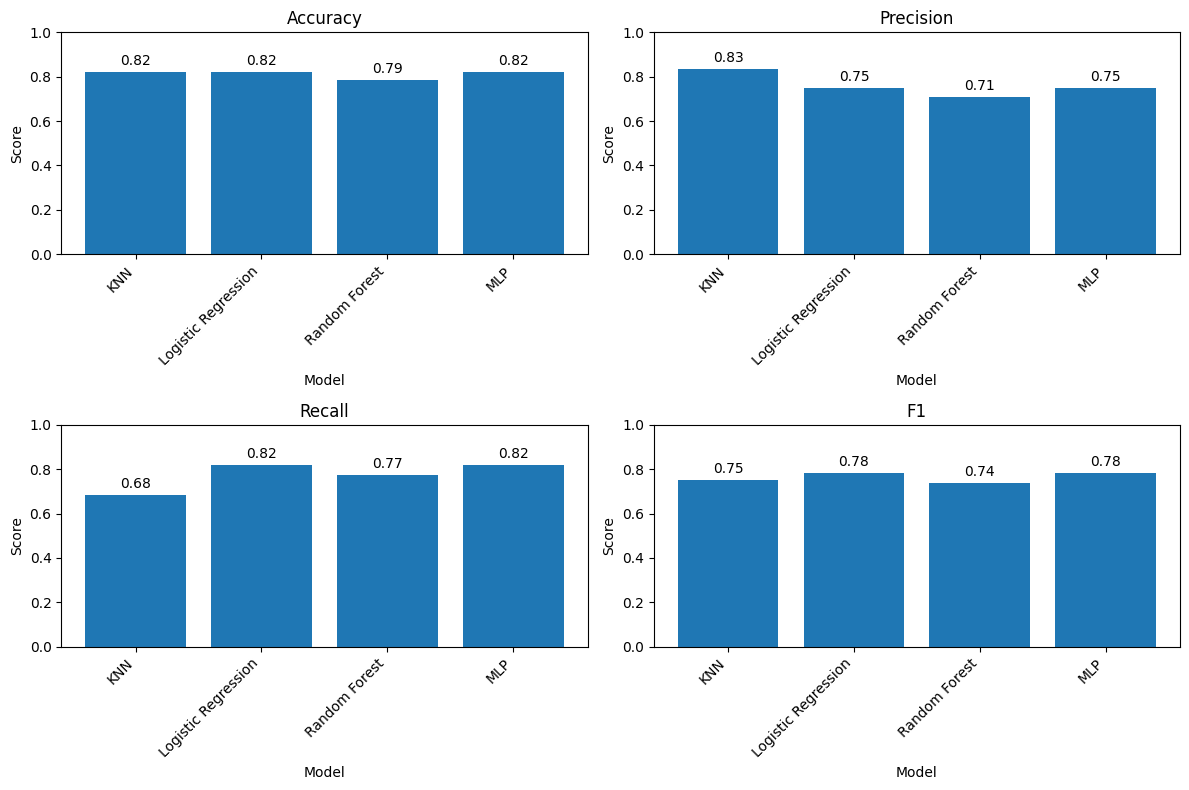

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


                 Model  Accuracy  Precision    Recall        F1
0                  KNN  0.821429   0.833333  0.681818  0.750000
1  Logistic Regression  0.821429   0.750000  0.818182  0.782609
2        Random Forest  0.785714   0.708333  0.772727  0.739130
3                  MLP  0.821429   0.750000  0.818182  0.782609


<ipython-input-31-8f4b814bd86a>:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')
<ipython-input-31-8f4b814bd86a>:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')
<ipython-input-31-8f4b814bd86a>:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')
<ipython-input-31-8f4b814bd86a>:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')


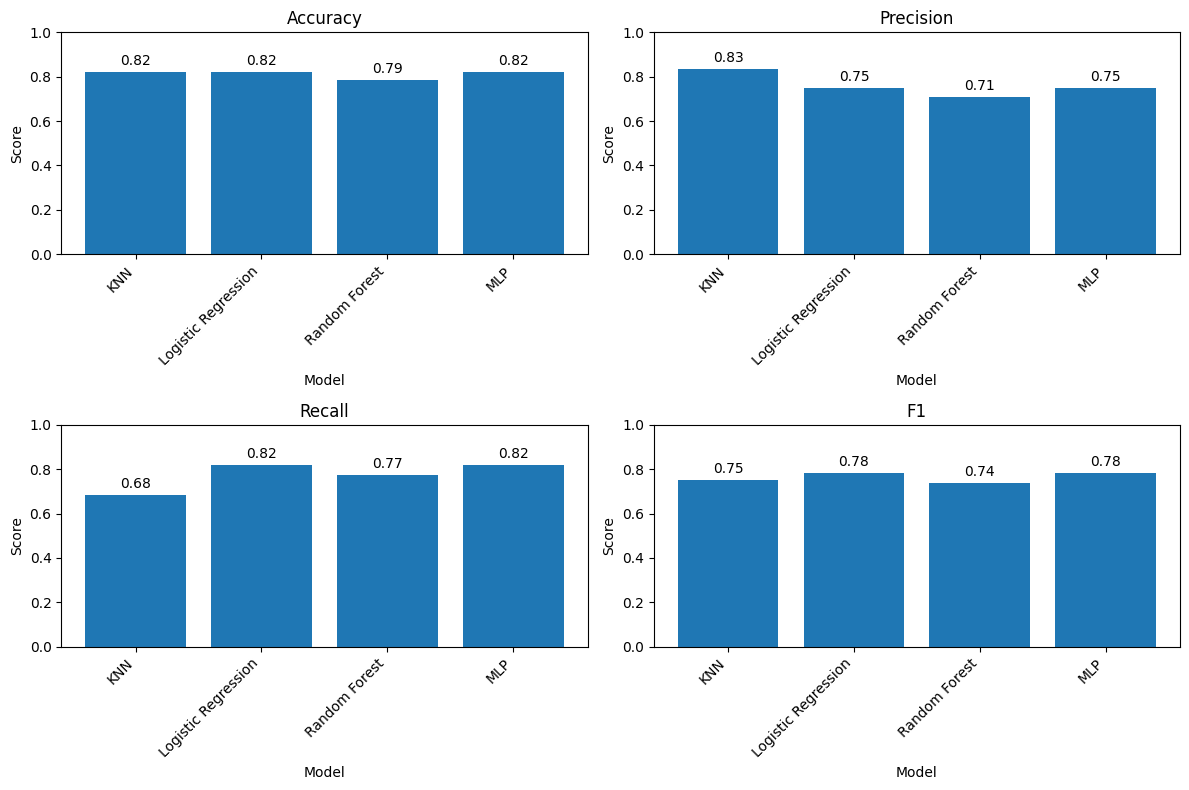

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {"KNN": KNeighborsClassifier(n_neighbors=2),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "MLP": MLPClassifier(max_iter=1000),}

# Create function to fit and score models with cross-validation
def fit_and_score_cv(models, X, y, cv=5):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv)
        mean_score = np.mean(scores)
        model_scores[name] = mean_score
    return model_scores

# Get cross-validated scores
model_scores_cv = fit_and_score_cv(models=models, X=X_train, y=y_train, cv=5)

# Define lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform cross-validation and compute evaluation metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Create DataFrame for evaluation metrics before tuning
eval_metrics_before = pd.DataFrame({
    "Model": models.keys(),
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1": f1_scores
})
# Print evaluation metrics
print(eval_metrics_before)

# Bar plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

# Flatten the axes array
axes_flat = axes.flatten()

for metric, ax in zip(metrics, axes_flat):
    scores = eval_metrics_before[metric].values
    bars = ax.bar(eval_metrics_before['Model'], scores)
    ax.set_title(metric)
    ax.set_ylim([0, 1])
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')

    # Function to add labels to bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {"KNN": KNeighborsClassifier(n_neighbors=2),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "MLP": MLPClassifier(max_iter=1000),}

# Create function to fit and score models with cross-validation
def fit_and_score_cv(models, X, y, cv=5):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv)
        mean_score = np.mean(scores)
        model_scores[name] = mean_score
    return model_scores

# Get cross-validated scores
model_scores_cv = fit_and_score_cv(models=models, X=X_train, y=y_train, cv=5)

# Define lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform cross-validation and compute evaluation metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Create DataFrame for evaluation metrics before tuning
eval_metrics_before = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1": f1_scores
})
# Print evaluation metrics
print(eval_metrics_before)

# Bar plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

# Flatten the axes array
axes_flat = axes.flatten()

for metric, ax in zip(metrics, axes_flat):
    scores = eval_metrics_before[metric].values
    bars = ax.bar(eval_metrics_before['Model'], scores)
    ax.set_title(metric)
    ax.set_ylim([0, 1])
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')

    # Function to add labels to bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bars)

plt.tight_layout()
plt.show()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {"KNN": KNeighborsClassifier(n_neighbors=2),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "MLP": MLPClassifier(max_iter=1000)}

# Create function to fit and score models with cross-validation
def fit_and_score_cv(models, X, y, cv=5):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv)
        mean_score = np.mean(scores)
        model_scores[name] = mean_score
    return model_scores

# Get cross-validated scores
model_scores_cv = fit_and_score_cv(models=models, X=X_train, y=y_train, cv=5)

# Define lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform cross-validation and compute evaluation metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Create DataFrame for evaluation metrics before tuning
eval_metrics_before = pd.DataFrame({
    "Model": models.keys(),
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1": f1_scores
})
# Print evaluation metrics
print(eval_metrics_before)

# Bar plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

# Flatten the axes array
axes_flat = axes.flatten()

for metric, ax in zip(metrics, axes_flat):
    scores = eval_metrics_before[metric].values
    bars = ax.bar(eval_metrics_before['Model'], scores)
    ax.set_title(metric)
    ax.set_ylim([0, 1])
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.set_xticklabels(eval_metrics_before['Model'], rotation=45, ha='right')

    # Function to add labels to bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bars)

plt.tight_layout()
plt.show()
plt.show()

In [ ]:
# Model Fine-tuning: 1. KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid where k is between 1 and 20
knn_param_grid = {'n_neighbors': range(1, 21)}

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
knn_grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters for KNN:", knn_grid_search.best_params_)

# Make predictions on the test set using the best model
knn_accuracy = knn_grid_search.best_estimator_.score(X_test, y_test)
print("KNN Accuracy:", knn_accuracy)

Best parameters for KNN: {'n_neighbors': 10}
KNN Accuracy: 0.8392857142857143


In [ ]:
# Model Fine-tuning: 2. Logistic Regression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import warnings

# Suppress warnings for UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

# Ensure the target variable is a factor
df['num'] = df['num'].astype('category')

# Define the preprocessing steps
preprocessor = StandardScaler()

# Define the logistic regression model with increased max_iter
logistic_regression = LogisticRegression(max_iter=1000)

# Create a pipeline that combines preprocessing and modeling
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', logistic_regression)])

# Specify cross-validation settings (Stratified K-Fold with 5 folds)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=33)

# Specify the hyperparameter grid for tuning
param_grid = {
    'classifier__penalty': ['l1', 'l2'],                  # Penalty term
    'classifier__C': np.logspace(-3, 3, 7),               # Regularization parameter
    'classifier__solver': ['liblinear', 'saga']           # Solver for optimization
}

# Perform hyperparameter tuning using grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X, y)

# Get the best-tuned model based on accuracy
best_estimator = grid_search.best_estimator_

# Make predictions
predictions = best_estimator.predict(X)

# Calculate accuracy
lr_accuracy = accuracy_score(df['num'], predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Print best score
print("Best Score:", grid_search.best_score_)

Logistic Regression Accuracy: 0.8453237410071942
Best Parameters: {'classifier__C': np.float64(0.001), 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Score: 0.834575569358178


In [ ]:
# Model Fine-tuning: 3. Random Forests
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define a function to train Random Forest with a specified number of trees
def train_rf_with_trees(X_train, y_train, num_trees):
    rf = RandomForestClassifier(n_estimators=num_trees, min_samples_leaf=10, random_state=33)
    rf.fit(X_train, y_train)
    return rf

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': range(1, 101, 5),
    'min_samples_leaf': range(5, 51, 5)
}

# Perform hyperparameter tuning using grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=33),
                           param_grid=param_grid, scoring='accuracy', cv=4)
grid_search.fit(X_train, y_train)

# Get the best-tuned model based on accuracy
best_estimator = grid_search.best_estimator_

# Make predictions
predictions_pruned = best_estimator.predict(X_test)

# Calculate accuracy
accuracy_pruned = accuracy_score(y_test, predictions_pruned)
print("Pruned Random Forest Accuracy (num_trees =", best_estimator.n_estimators, ", min_samples_leaf =", best_estimator.min_samples_leaf, "):", accuracy_pruned)

Pruned Random Forest Accuracy (num_trees = 71 , min_samples_leaf = 15 ): 0.8392857142857143


In [ ]:
# Model Fine-tuning: 4. Multi-layer Perceptron classifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Create MLPClassifier instance
mlp = MLPClassifier(max_iter=1000)

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01}
Best Score: 0.8414285714285714


                 Model  Accuracy  Precision    Recall        F1
0                  KNN  0.857143   0.958333  0.766667  0.851852
1  Logistic Regression  0.892857   0.961538  0.833333  0.892857
2        Random Forest  0.821429   0.954545  0.700000  0.807692
3                  MLP  0.875000   0.960000  0.800000  0.872727


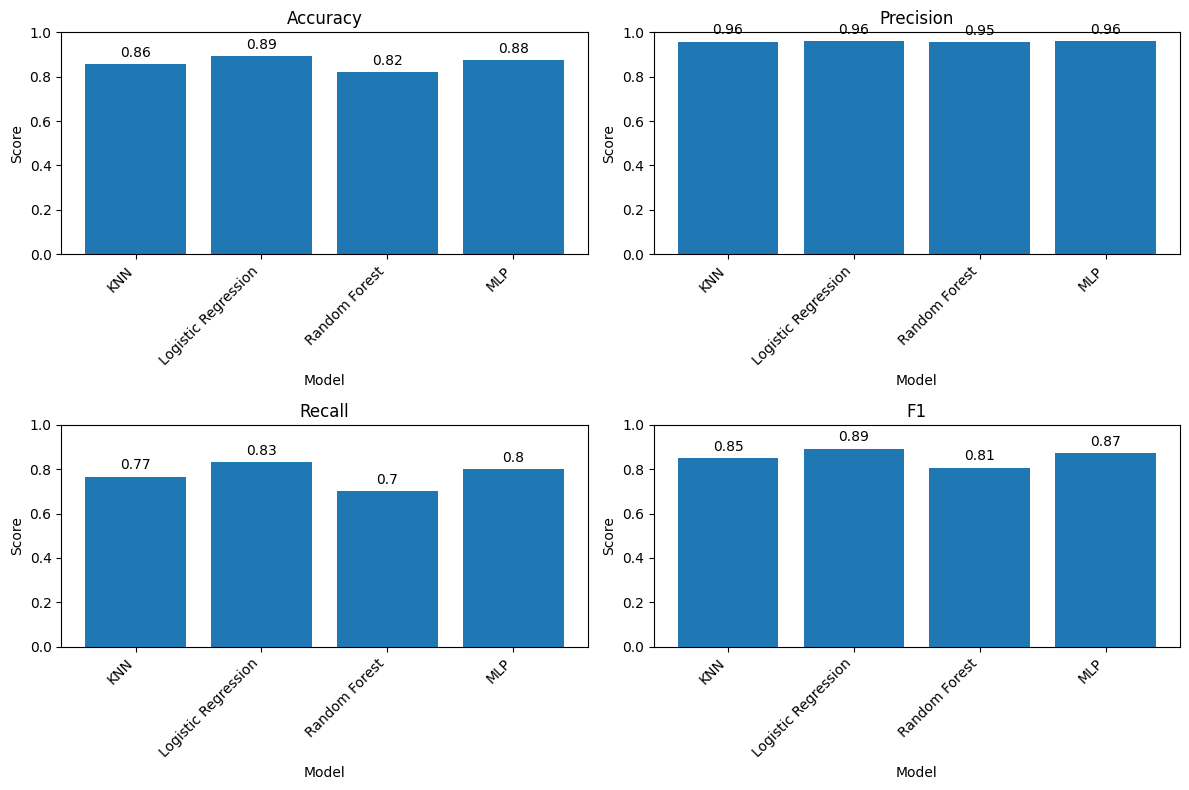

In [ ]:
# Create models with the tuned hyperparameters
tuned_KNN = KNeighborsClassifier(n_neighbors=13)
tuned_LR = LogisticRegression(
    C=0.1,
    penalty='l1',
    solver='liblinear'
)

tuned_RF = RandomForestClassifier(
    n_estimators=16,
    min_samples_leaf=30,
    random_state=42
)

tuned_MLP = MLPClassifier(
    activation='tanh',
    alpha=0.0001,
    hidden_layer_sizes=(50,),
    learning_rate_init=0.001,
    random_state=42
)

# Store the models in a dictionary
tuned_models = {
    'KNN': tuned_KNN,
    'Logistic Regression': tuned_LR,
    'Random Forest': tuned_RF,
    'MLP': tuned_MLP
}

# Fit each tuned model on the training data
for model_name, model in tuned_models.items():
    model.fit(X_train, y_train)

# Initialize lists to store evaluation metrics after tuning
tuned_accuracy_scores = []
tuned_precision_scores = []
tuned_recall_scores = []
tuned_f1_scores = []

# Loop through tuned models
for model_name, model in tuned_models.items():
    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append evaluation metrics to respective lists
    tuned_accuracy_scores.append(accuracy)
    tuned_precision_scores.append(precision)
    tuned_recall_scores.append(recall)
    tuned_f1_scores.append(f1)

# Create DataFrame for evaluation metrics after tuning
eval_metrics_after = pd.DataFrame({
    "Model": tuned_models.keys(),
    "Accuracy": tuned_accuracy_scores,
    "Precision": tuned_precision_scores,
    "Recall": tuned_recall_scores,
    "F1": tuned_f1_scores,
})

# Print evaluation metrics after tuning
print(eval_metrics_after)

# Bar plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

# Flatten the axes array
axes_flat = axes.flatten()

for metric, ax in zip(metrics, axes_flat):
    scores = eval_metrics_after[metric].values
    bars = ax.bar(eval_metrics_after['Model'], scores)
    ax.set_title(metric)
    ax.set_ylim([0, 1])
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.set_xticklabels(eval_metrics_after['Model'], rotation=45, ha='right')

    # Function to add labels to bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bars)

plt.tight_layout()
plt.show()